### Importing the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick 

In [3]:
# use these links to do so:
df=pd.read_csv("churn.csv")

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,7590-VHVEG,Female,No,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,"(0, 5]"
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,"(30, 35]"
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,"(0, 5]"
3,7795-CFOCW,Male,No,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,"(40, 45]"
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,"(0, 5]"


### Understanding the data

In [5]:
df.shape

(7043, 21)

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Data Manipulation

In [ ]:
df['TotalCharges']=df.TotalCharges.convert_objects(convert_numeric=True)

In [8]:
df['tenure_range']=pd.cut(df.tenure,[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75],right=True)

(0, 5]      1360
(5, 10]      599
(70, 75]     532
(65, 70]     501
(10, 15]     500
(20, 25]     411
(15, 20]     408
(60, 65]     374
(25, 30]     352
(30, 35]     351
(50, 55]     350
(55, 60]     348
(45, 50]     340
(40, 45]     312
(35, 40]     294
Name: tenure_range, dtype: int64


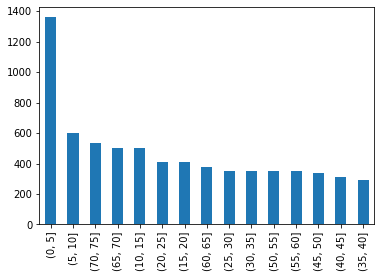

In [11]:
print(df['tenure_range'].value_counts())
df['tenure_range'].value_counts().plot(kind='bar')

In [12]:
df.dropna(inplace=True)

In [12]:
df.drop('tenure',axis=1,inplace=True)

In [13]:
df['SeniorCitizen']=df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [15]:
df['Churn']=df['Churn'].map({"No":0,"Yes":1})

### Data Visualization

### Starting from Gender Distribution:

In [19]:
df['gender'].value_counts()*100/len(df)

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

In [18]:
len(df)

7043

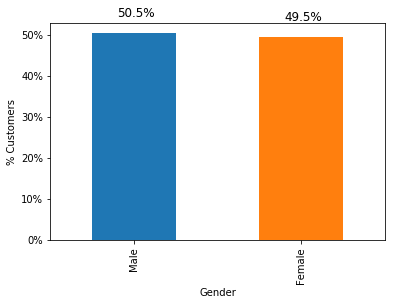

In [16]:
gender_dis=(df['gender'].value_counts()*100/len(df)).plot(kind='bar',stacked=True)
gender_dis.set_ylabel('% Customers')
gender_dis.set_xlabel('Gender')
gender_dis.yaxis.set_major_formatter(mtick.PercentFormatter())

# totals = []
# for i in gender_dis.patches:
#     totals.append(i.get_width())
# total = sum(totals)

# #to print the values on top of the bars
# for i in gender_dis.patches:
#     gender_dis.text(i.get_x()+.15, i.get_height()+3.9, \
#             str(round((i.get_height()/total), 1))+'%',
#             fontsize=12,
#             color='black')

### Findings: we can observe that slightly more than half of the data are males and remaining are females.

## Senior Citizens Distribution

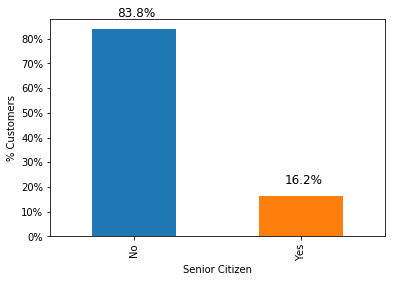

In [17]:
sc_dis=(df['SeniorCitizen'].value_counts()*100/len(df)).plot(kind='bar',stacked=True)
sc_dis.set_ylabel('% Customers')
sc_dis.set_xlabel('Senior Citizen')
sc_dis.yaxis.set_major_formatter(mtick.PercentFormatter())

totals = []
for i in sc_dis.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in sc_dis.patches:
    sc_dis.text(i.get_x()+.15, i.get_height()+5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='black')

### Findings: there are only 16.2% i.e. 1140 Senior Citizens from overall 7043 customers.

In [26]:
df.groupby(['SeniorCitizen','Dependents']).size().unstack()

Dependents,No,Yes
SeniorCitizen,,
No,3882,2019
Yes,1051,91


## Customers who are Senior Citizens and Dependents

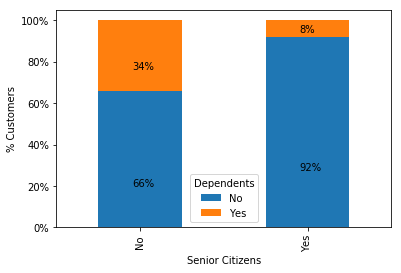

In [18]:
sc_dependents=df.groupby(['SeniorCitizen','Dependents']).size().unstack()
sc_dependents=(sc_dependents.T*100/sc_dependents.T.sum()).T.plot(kind='bar',stacked=True)
sc_dependents.set_ylabel('% Customers')
sc_dependents.set_xlabel('Senior Citizens')
sc_dependents.yaxis.set_major_formatter(mtick.PercentFormatter())
# for i in sc_dependents.patches:
#     width, height = i.get_width(), i.get_height()
#     x, y =i.get_xy() 
#     sc_dependents.annotate('{:.0f}%'.format(height), (i.get_x()+.40*width, i.get_y()+.3*height),
#                 color = 'black')

### Findings: there are very less senior citizens who are dependents (8%) i.e. only 91 customers,on the otherhand majority (66%) of the customers are not senior citizens and also not dependents.

## customers who has partners and dependents

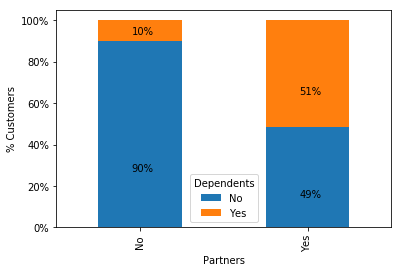

In [19]:
sc_dependents=df.groupby(['Partner','Dependents']).size().unstack()
sc_dependents=(sc_dependents.T*100/sc_dependents.T.sum()).T.plot(kind='bar',stacked=True)
sc_dependents.set_ylabel('% Customers')
sc_dependents.set_xlabel('Partners')
sc_dependents.yaxis.set_major_formatter(mtick.PercentFormatter())
for i in sc_dependents.patches:
    width, height = i.get_width(), i.get_height()
    x, y =i.get_xy() 
    sc_dependents.annotate('{:.0f}%'.format(height), (i.get_x()+.40*width, i.get_y()+.3*height),
                color = 'black')

### Findings: For 90% of customers who do'nt have partners are also not dependents,surprisingly 49% of customers who has partrners are also not dependents,while 51% of them are dependents.

# Distribution of customers based on payment method

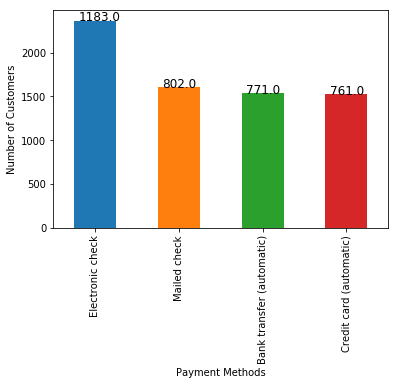

In [20]:
payment_dis=(df['PaymentMethod'].value_counts()).plot(kind='bar',stacked=True)
payment_dis.set_ylabel('Number of Customers')
payment_dis.set_xlabel('Payment Methods')
#payment_dis.yaxis.set_major_formatter(mtick.PercentFormatter())

totals = []
for i in payment_dis.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in payment_dis.patches:
    payment_dis.text(i.get_x()+.05, i.get_height()-4.5, \
            str(np.ceil((i.get_height()/total))),
            fontsize=12,
            color='black')

### Findings: Customers with Electronic Payment are churning more than any other customers.

## Churn based on the Tenure Range

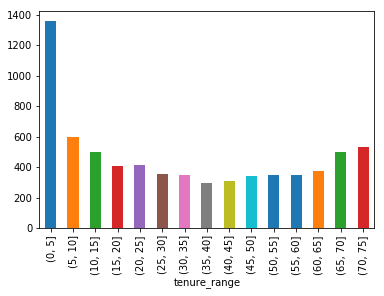

In [21]:
df.groupby(['tenure_range'])['Churn'].size().plot(kind='bar')

### Findings: Customers whose tenure is between [0-5] their churning rate is high,and as tenure is increasing the churning rate is decreasing,so we can say that customers who are not churning are staying for longer period.So shorter the tenure,higher is the probability of churn.

## Churn by Contract Type

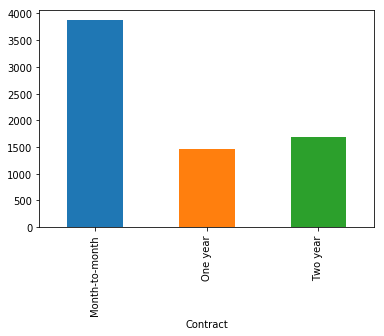

In [22]:
df.groupby(['Contract'])['Churn'].count().plot(kind='bar')

### Findings: Nothing Surprising,Customers who had month-to-month contract has highest churning rate, and second is Two year contract.

# Distribution of All Service Provided by the company

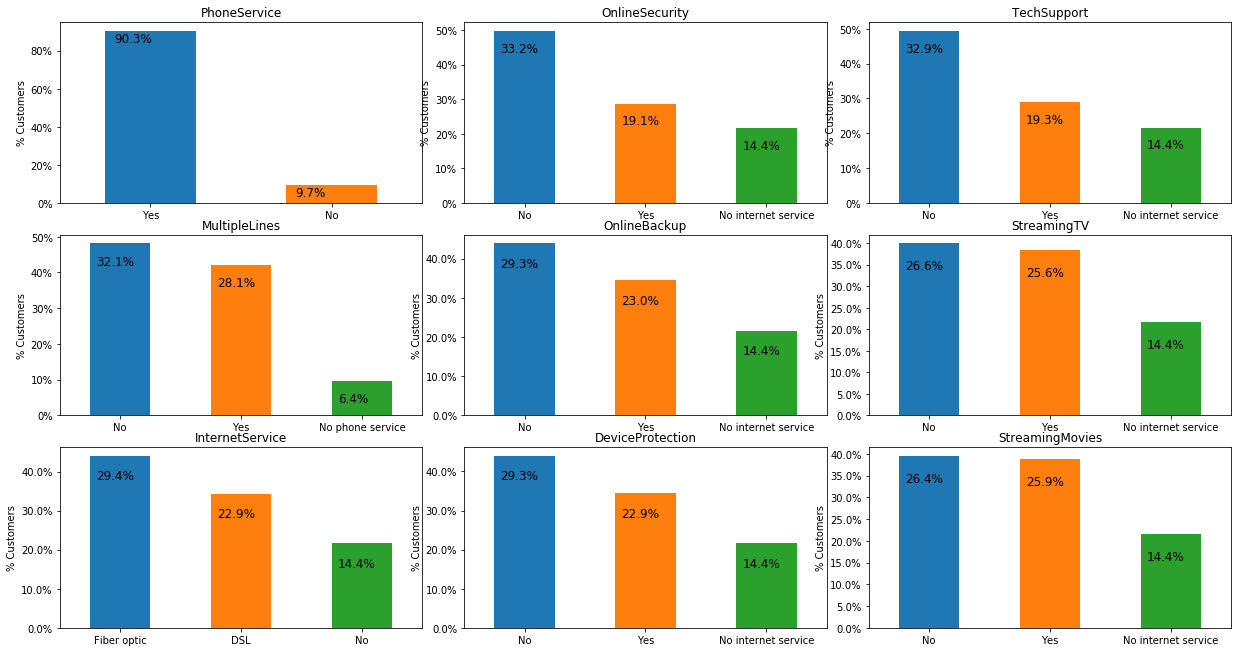

In [23]:
all_services=['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(17,9))
fig.tight_layout()
for i, item in enumerate(all_services):
    if i < 3:
        ax =(df[item].value_counts()*100/len(df)).plot(kind = 'bar',ax=axes[i,0],rot = 0)
        ax.set_ylabel('% Customers')
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        
        totals = []
        for i in ax.patches:
            totals.append(i.get_width())
        total = sum(totals)
        
        for i in ax.patches:
            ax.text(i.get_x()+.05, i.get_height()-6, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='black')
        
    elif i >=3 and i < 6:
        ax =(df[item].value_counts()*100/len(df)).plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        ax.set_ylabel('% Customers')
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        
        totals = []
        for i in ax.patches:
            totals.append(i.get_width())
        total = sum(totals)
        
        for i in ax.patches:
            ax.text(i.get_x()+.05, i.get_height()-6, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='black')
        
    elif i < 9:
        ax =(df[item].value_counts()*100/len(df)).plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
        ax.set_ylabel('% Customers')
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        
        totals = []
        for i in ax.patches:
            totals.append(i.get_width())
        total = sum(totals)
        
        for i in ax.patches:
            ax.text(i.get_x()+.05, i.get_height()-6, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='black')
        
    ax.set_title(item)

## which service has highest impact on churn

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


Text(0.5,1,'Which Service Customers Churn Higher')

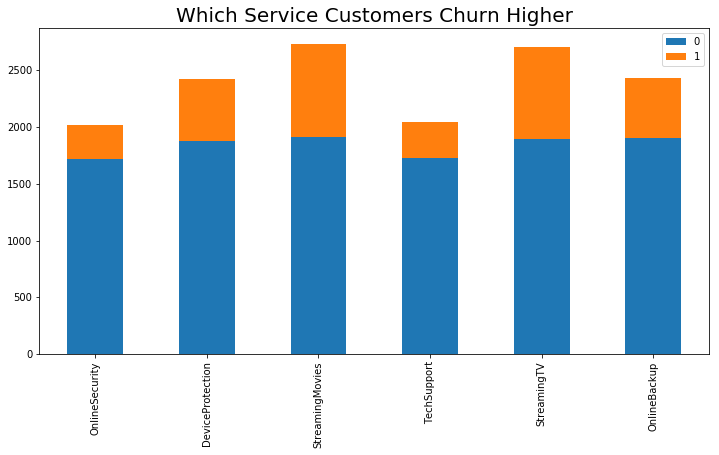

In [24]:
company_services = df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies'
                                       ,'TechSupport', 'StreamingTV', 'OnlineBackup', 'Churn']]
company_services.replace(to_replace='Yes', value=1, inplace=True)
company_services.replace(to_replace='No', value=0, inplace=True)
company_services = company_services[company_services.OnlineSecurity !='No internet service']             
groupby_aggregation = company_services.groupby('Churn', as_index=False)[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport',
                                                               'StreamingTV', 'OnlineBackup']].sum()
ax = groupby_aggregation.set_index('Churn').T.plot(kind='bar', stacked=True, figsize=(12,6))
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')
ax.set_title('Which Service Customers Churn Higher', fontsize=20)

### Findings: Customers who are purchasing 'StreamingMovies' and 'StreamingTV' services churning more.

# Churn by Online Security Service

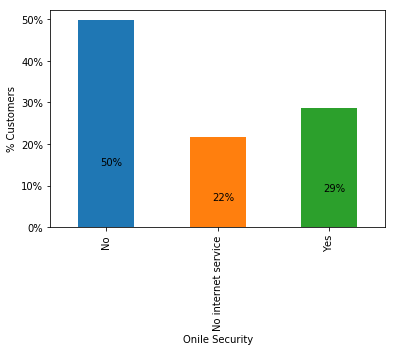

In [25]:
OnileSecuity_churn=df.groupby(['OnlineSecurity'])['Churn'].size()
OnileSecuity_churn=(OnileSecuity_churn.T*100/OnileSecuity_churn.T.sum()).T.plot(kind='bar',stacked=True)
OnileSecuity_churn.set_ylabel('% Customers')
OnileSecuity_churn.set_xlabel('Onile Security')
OnileSecuity_churn.yaxis.set_major_formatter(mtick.PercentFormatter())
for i in OnileSecuity_churn.patches:
    width, height = i.get_width(), i.get_height()
    x, y =i.get_xy() 
    OnileSecuity_churn.annotate('{:.0f}%'.format(height), (i.get_x()+.40*width, i.get_y()+.3*height),
                color = 'black')

### Findings: Customers who did not purchased online security service are churning more.

# Churn by TechSupport Service

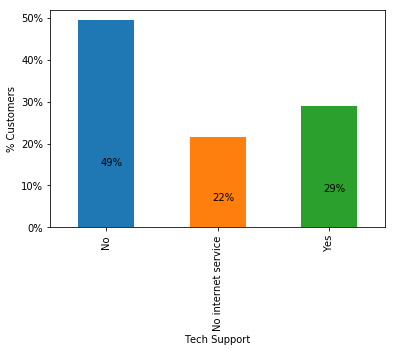

In [43]:
TechSupport_churn=df.groupby(['TechSupport'])['Churn'].size()
TechSupport_churn=(TechSupport_churn.T*100/TechSupport_churn.T.sum()).T.plot(kind='bar',stacked=True)
TechSupport_churn.set_ylabel('% Customers')
TechSupport_churn.set_xlabel('Tech Support')
TechSupport_churn.yaxis.set_major_formatter(mtick.PercentFormatter())
for i in TechSupport_churn.patches:
    width, height = i.get_width(), i.get_height()
    x, y =i.get_xy() 
    TechSupport_churn.annotate('{:.0f}%'.format(height), (i.get_x()+.40*width, i.get_y()+.3*height),
                color = 'black')

### Findings: Customers who did not availed Tech Support service are churning more.

# Churn by Online Backup Service

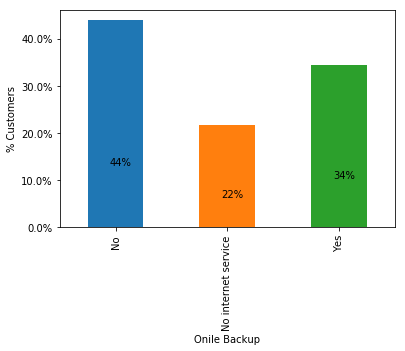

In [26]:
OnileBackup_churn=df.groupby(['OnlineBackup'])['Churn'].size()
OnileBackup_churn=(OnileBackup_churn.T*100/OnileBackup_churn.T.sum()).T.plot(kind='bar',stacked=True)
OnileBackup_churn.set_ylabel('% Customers')
OnileBackup_churn.set_xlabel('Onile Backup')
OnileBackup_churn.yaxis.set_major_formatter(mtick.PercentFormatter())
for i in OnileBackup_churn.patches:
    width, height = i.get_width(), i.get_height()
    x, y =i.get_xy() 
    OnileBackup_churn.annotate('{:.0f}%'.format(height), (i.get_x()+.40*width, i.get_y()+.3*height),
                color = 'black')

### Findings: Customers who did not purchased online Backup service are churning more.

# Churn by Streaming Movies Service

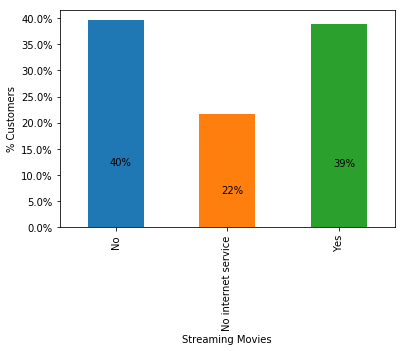

In [27]:
StreamingMovies_churn=df.groupby(['StreamingMovies'])['Churn'].size()
StreamingMovies_churn=(StreamingMovies_churn.T*100/StreamingMovies_churn.T.sum()).T.plot(kind='bar',stacked=True)
StreamingMovies_churn.set_ylabel('% Customers')
StreamingMovies_churn.set_xlabel('Streaming Movies')
StreamingMovies_churn.yaxis.set_major_formatter(mtick.PercentFormatter())
for i in StreamingMovies_churn.patches:
    width, height = i.get_width(), i.get_height()
    x, y =i.get_xy() 
    StreamingMovies_churn.annotate('{:.0f}%'.format(height), (i.get_x()+.40*width, i.get_y()+.3*height),
                color = 'black')

### Findings: Customers who purchased Streaming Movies service are almost equally churning with customers who did not purchased the service.

# Churn by Streaming TV Service

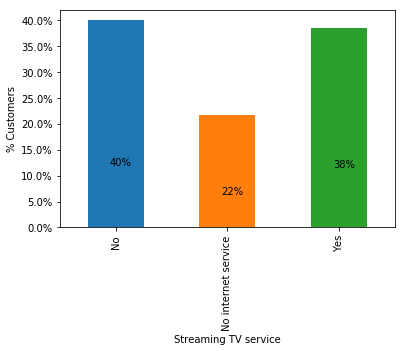

In [28]:
StreamingTV_churn=df.groupby(['StreamingTV'])['Churn'].size()
StreamingTV_churn=(StreamingTV_churn.T*100/StreamingTV_churn.T.sum()).T.plot(kind='bar',stacked=True)
StreamingTV_churn.set_ylabel('% Customers')
StreamingTV_churn.set_xlabel('Streaming TV service')
StreamingTV_churn.yaxis.set_major_formatter(mtick.PercentFormatter())
for i in StreamingTV_churn.patches:
    width, height = i.get_width(), i.get_height()
    x, y =i.get_xy() 
    StreamingTV_churn.annotate('{:.0f}%'.format(height), (i.get_x()+.40*width, i.get_y()+.3*height),
                color = 'black')

### Findings: Customers who purchased Streaming TV service are almost equally churning with customers who did not purchased the service.

# Churn by Internet Service Type

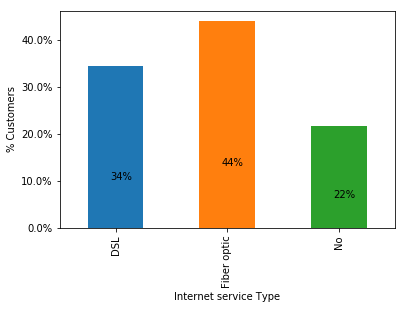

In [29]:
InternetService_churn=df.groupby(['InternetService'])['Churn'].size()
InternetService_churn=(InternetService_churn.T*100/InternetService_churn.T.sum()).T.plot(kind='bar',stacked=True)
InternetService_churn.set_ylabel('% Customers')
InternetService_churn.set_xlabel('Internet service Type')
InternetService_churn.yaxis.set_major_formatter(mtick.PercentFormatter())
for i in InternetService_churn.patches:
    width, height = i.get_width(), i.get_height()
    x, y =i.get_xy() 
    InternetService_churn.annotate('{:.0f}%'.format(height), (i.get_x()+.40*width, i.get_y()+.3*height),
                color = 'black')

### Findings: Customers who has Fiber Optic Service Type are mostly churning than DSL type customers.

# Churn based on Internet Service type and StreamingMovies Service

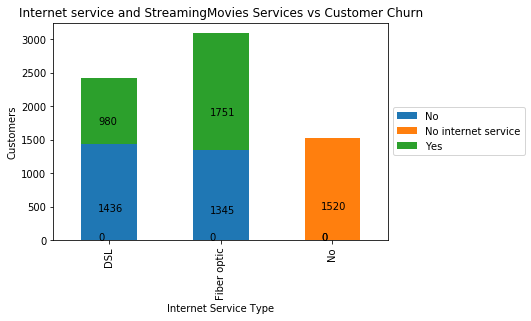

In [41]:
IS_SM=df.groupby(['InternetService','StreamingMovies'])['Churn'].size().unstack().plot(kind='bar',stacked=True)
IS_SM.set_ylabel('Customers')
IS_SM.set_xlabel('Internet Service Type')
IS_SM.legend(loc='center left', bbox_to_anchor=(1, 0.5))
IS_SM.set_title('Internet service and StreamingMovies Services vs Customer Churn')
for i in IS_SM.patches:
    width, height = i.get_width(), i.get_height()
    x, y =i.get_xy() 
    IS_SM.annotate('{:.0f}'.format(height), (i.get_x()+.30*width, i.get_y()+.3*height),color = 'black')

### Findings: Customers who opted for Fiber Optic Internet Service and also Streaming Movies service are the majority customers who are churning.

# Churn based on Internet Service type and StreamingTV Service

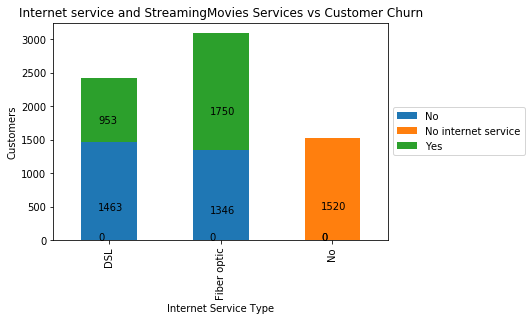

In [42]:
IS_STV=df.groupby(['InternetService','StreamingTV'])['Churn'].size().unstack().plot(kind='bar',stacked=True)
IS_STV.set_ylabel('Customers')
IS_STV.set_xlabel('Internet Service Type')
IS_STV.legend(loc='center left', bbox_to_anchor=(1, 0.5))
IS_STV.set_title('Internet service and StreamingMovies Services vs Customer Churn')
for i in IS_STV.patches:
    width, height = i.get_width(), i.get_height()
    x, y =i.get_xy() 
    IS_STV.annotate('{:.0f}'.format(height), (i.get_x()+.30*width, i.get_y()+.3*height),color = 'black')

### Findings: Customers who opted for Fiber Optic Internet Service and also StreamingTV service are the majority customers who are churning,and customers who availed DSL Internet Service type and not opted for StreamingTV service are also churning second.

# Monthly Charges vs Churn 

Text(0.5,0,'Churn')

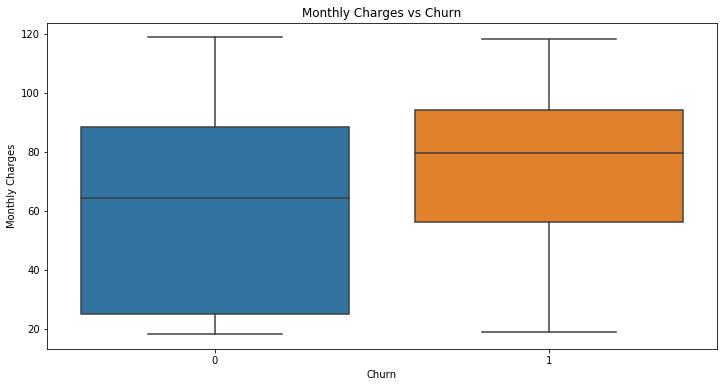

In [226]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
ax.set_title('Monthly Charges vs Churn')
ax.set_ylabel('Monthly Charges')
ax.set_xlabel('Churn')

In [230]:
### Higher the monthly charges more the churn rate,because people who are churning are paying arounf 80$ while non-churners are paying above 60$

In [ ]:
!pip install scikit-plot

### Implement Machine Learning Models

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm
from sklearn.metrics import f1_score, roc_auc_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt
from scikitplot.metrics import plot_roc_curve 

In [47]:
cat_x=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_range']].copy()

cat_x=pd.get_dummies(cat_x)
num_x=df[['MonthlyCharges', 'TotalCharges']].copy()

x=pd.concat([cat_x,num_x],axis=1)
y=df['Churn']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Randon Forest Classifier

In [49]:
clf = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1, class_weight="balanced",oob_score=True)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=0,
            verbose=0, warm_start=False)

### Model Evaluation

In [50]:
rf_predictions=clf.predict(x_test)
print("Random Forest Accuracy:",sm.accuracy_score(y_test,rf_predictions)*100)

Random Forest Accuracy: 77.53554502369668


In [51]:
sm.confusion_matrix(y_test,rf_predictions)

array([[1381,  168],
       [ 306,  255]], dtype=int64)

In [52]:
report=sm.classification_report(y_test,rf_predictions)
print(report)

             precision    recall  f1-score   support

          0       0.82      0.89      0.85      1549
          1       0.60      0.45      0.52       561

avg / total       0.76      0.78      0.76      2110



## ROC Curve

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


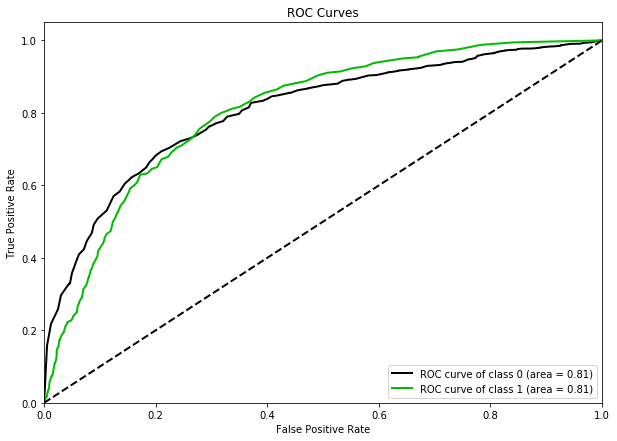

In [63]:
y_pred_probs = clf.predict_proba(x_test)
plot_roc_curve(y_test, y_pred_probs, curves=['each_class'], figsize=(10,7))
plt.show()

## Finetuning using GridSearchCV

In [ ]:
params = {'max_depth': range(1,10,2),
          'max_features': ['auto', 'sqrt','log2'],
          'n_estimators': [200, 400, 600, 800, 1000, 1200],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10]
         }

Grid_randomF = GridSearchCV(RandomForestClassifier(random_state=15), params)

Grid_randomF.fit(x_train, y_train)

print(Grid_randomF.best_params_)

In [189]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced",oob_score=True,**Grid_randomF.best_params_)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=True, random_state=0,
            verbose=0, warm_start=False)

In [ ]:
clf_score = cross_val_score(clf, x_train, y_train, cv=10)
print(clf_score)
clf_score.mean()

## Top 10 Important Features

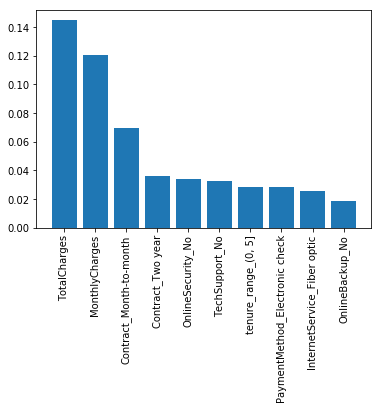

In [253]:
imp_features=clf.feature_importances_
cols=x_train.columns
important_features=[]
for feat_names in zip(cols,imp_features):
    important_features.append(feat_names)

#imp_vals=pd.series(imp_features,x.columns.values)
top_10_features=sorted(important_features, key=lambda x: x[1],reverse=True)[:10]
plt.bar(*zip(*top_10_features))
plt.xticks(rotation=90)
plt.show()

### Here we can observe TotalCharges,MonthlyCharges,Contract_Month-to-Month are top three important features to predict churn in random Forest
### As we saw in our EDA that if monthlycharges are increasing the churn rate is also increasing, and most churners are from Month-to-Month contract,so we can confidently say that these predictor variables are playing crucial role in predicting churn.

## Least Important Features

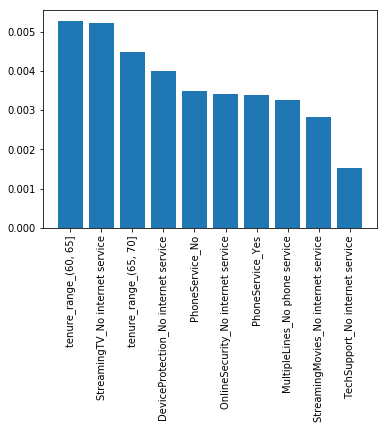

In [254]:
imp_features=clf.feature_importances_
cols=x_train.columns
important_features=[]
for feat_names in zip(cols,imp_features):
    important_features.append(feat_names)

#imp_vals=pd.series(imp_features,x.columns.values)
top_10_features=sorted(important_features, key=lambda x: x[1],reverse=True)[-10:]
plt.bar(*zip(*top_10_features))
plt.xticks(rotation=90)
plt.show()

### here if we observe more Tenure_range(60-65] and (65-70] along with NoInternetService in all services is least important feature to predict the churn.

# Logistic Regression

In [53]:
logit_model=LogisticRegression().fit(x_train,y_train)
logit_predictions=logit_model.predict(x_test)

### Model Evaluation

In [54]:
print("Logistic Regression Accuracy:",sm.accuracy_score(y_test,logit_predictions)*100)

Logistic Regression Accuracy: 79.62085308056872


In [55]:
sm.confusion_matrix(y_test,logit_predictions)

array([[1392,  157],
       [ 273,  288]], dtype=int64)

In [56]:
report=sm.classification_report(y_test,logit_predictions)
print(report)

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1549
          1       0.65      0.51      0.57       561

avg / total       0.79      0.80      0.79      2110



## ROC curve

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


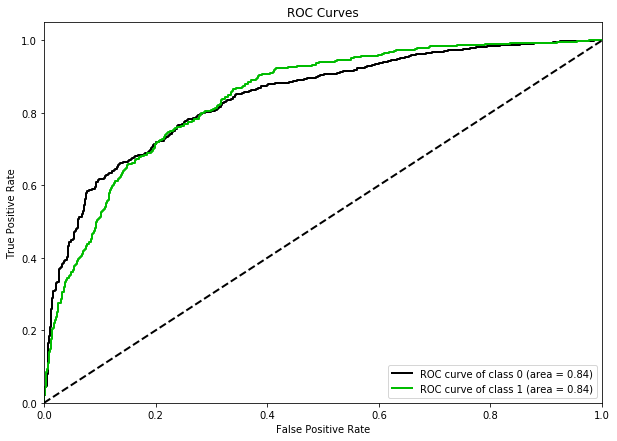

In [64]:
y_pred_probs = logit_model.predict_proba(x_test)
plot_roc_curve(y_test, y_pred_probs, curves=['each_class'], figsize=(10,7))
plt.show()

### Important Features

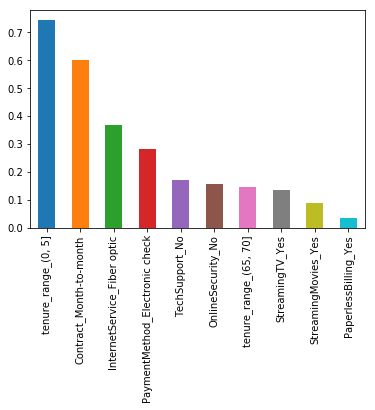

In [259]:
top_feats=pd.Series(logit_model.coef_[0],index=x.columns)
top_feats.sort_values(ascending=False)[:10].plot(kind="bar")

### Here we can observe tenure_range(0,5],Contract_Month-to-Month,InternetService_FiberOptic are top three important features to predict churn in Logistic Regression.
### As we saw in our EDA most of the churners are from customers who are having tenure(0-5] and month-month contract and also customers who are availing fiberoptic internet service.

## In both the models(Random Forest and Logistic regression),Logistic regression got highest accuracy and if we consider Precison and Recall, logistic regression has predicted well in both the models, and as we observe ROC curves for both the models Logistic regression has more AUC i.e. 0.84 while Random Forest has 0.81.

### Final Conclusions

### Inorder to solve churn problem company need to concentrate on Different Factors:
### 1) Customers who availed Month-to-Month contract has high churning rate among all the other contracts, so company can provide different intresting offers to those customers who has choosen monthly contract, so that we can decrease the churning rate, and customers who availed 2 year contract also churning in second place, so company can offer any intresting offers before their contract ends,so they'll stay back. 
### 2) As Monthly charges are increasing churning rate is also increasing, so inorder to decrease the churning rate, company should take a decision on the monthly charges by decreasing them to an extent.
### 3) Customers who Availed Streaming Movies and Streaming Tv services are churning at high rate, it might be based on different factors like speed of the internet, Internet service type that customer opting for etc.,as we observed in our EDA that customers who opted for FiberOptic and StreamingMovies and StreamingTV services are highly churning,so we can say that FiberOptic Internet service is one factor to consider regarding churning of customers.
### 4) Customers who did not avalied Servies like OnlineBackup, Device Protection, Techsupport, PhoneService, MultipleLines are Churning a lot, So company can take different measures that makes customer to choose that services so they won't churn.
### 5) Customers who has choosen FiberOptic Internet Service are churning a lot, so company can check out reasons because their might be different reasons that effect Internet service like speed of that particular service etc.

## So here are some Factors that are leading to customer churn and measures to be taken to reduce the churn.